# Data Exploration and Preparation

## Data

The file movies_merged contains a dataframe with the same name that has 40K rows and 39 columns. Each row represents a movie title and each column represents a descriptor such as Title, Actors, and Budget. I collected the data by querying IMDb’s API (see www.omdbapi.com) and joining it with a separate dataset of movie budgets and gross earnings (unknown to you). The join key was the movie title. This data is available for personal use, but IMDb’s terms of service do not allow it to be used for commercial purposes or for creating a competing repository.

## Objective

Your goal is to investigate the relationship between the movie descriptors and the box office success of movies, as represented by the variable Gross. This task is extremely important as it can help a studio decide which titles to fund for production, how much to bid on produced movies, when to release a title, how much to invest in marketing and PR, etc. This information is most useful before a title is released, but it is still very valuable after the movie is already released to the public (for example it can affect additional marketing spend or how much a studio should negotiate with on-demand streaming companies for “second window” streaming rights).

## Setup

### Load Packages

In [1]:
# You may load other packages like seaborn for plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

### Load Data

Load the CSV file into a dataframe called "df" and perform the following initial investigations:
    * list the dimensions of the df
    * list the head
    * list the summary
    * describe the df

In [2]:
# Code here
import pandas as pd
data = pd.read_csv("/Users/preranasingh/Desktop/sp jain/data science with python/movies.csv")  


In [3]:
data.shape

(40789, 40)

In [4]:
data.head(50)

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoURL,DVD,BoxOffice,Production,Website,Response,Budget,Domestic_Gross,Gross,Date
0,1,39 Pounds of Love,2005,UNRATED,2005-04-08,70 min,"Documentary, Biography, Romance",Dani Menkin,"Ilan Heitner, Dani Menkin",Ami Ankilewitz,...,http://www.rottentomatoes.com/m/1175966-color_...,2007-05-29,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1,2,3:am,2005,NOT RATED,2005-01-25,21 min,"Short, Thriller",Ryan Bradford,"Ryan Bradford, Ryen Schlegel","Mike Ashworth, Jen Badewitz, Ryan Bradford, Se...",...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
2,3,500 Years Later,2005,NaN,2005-02-24,106 min,Documentary,Owen Alik Shahadah,M.K. Asante,"Kolfi Adu, Sona Jobarteh, Hunter Adams III, Ha...",...,http://www.rottentomatoes.com/m/500_years_later/,2008-01-08,NaN,Codeblack TV,http://www.500yearslater.com/,True,NaN,NaN,NaN,NaN
3,4,5th World,2005,NaN,2005-01-20,75 min,"Drama, Romance",Blackhorse Lowe,Blackhorse Lowe,"Livandrea Knoki, Sheldon Silentwalker, Ernest ...",...,http://www.rottentomatoes.com/m/world_poker_5t...,2006-10-31,NaN,NaN,http://www.variety.com/review/VE1117926147.htm...,True,NaN,NaN,NaN,NaN
4,5,90,2005,NaN,2005-03-12,14 min,"War, Short",Jason Wise,Jason Wise,"Bryan Barnett-Woods, Oto Brezina, Mike Dunn, E...",...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
5,6,Abel Raises Cain,2005,NaN,2005-01-23,82 min,"Documentary, Biography","Jenny Abel, Jeff Hockett","Jenny Abel, Jeff Hockett","Alan Abel, Jeanne Abel, Frank Murgalo, Jenny Abel",...,http://www.rottentomatoes.com/m/raising_cain_b...,2006-02-21,NaN,Powderhouse Productions,NaN,True,NaN,NaN,NaN,NaN
6,7,Acne,2000,NaN,2005-06-03,65 min,"Comedy, Horror, Sci-Fi",Rusty Nails,Rusty Nails,"Tracey Hayes, Rusty Nails, Jim Darley, Mary Lu...",...,http://www.rottentomatoes.com/m/acne_2000/,2005-06-28,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
7,8,One Senseless Act: The Khamisa Story,1999,NaN,NaN,NaN,Documentary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
8,9,Akoibon,2005,NaN,2005-04-13,95 min,"Comedy, Adventure, Romance",Edouard Baer,Edouard Baer,"Jean Rochefort, Nader Boussandel, Marie Denarn...",...,http://www.rottentomatoes.com/m/akoibon/,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
9,10,Alien Abduction,2014,NOT RATED,2014-05-01,85 min,"Horror, Sci-Fi, Thriller",Matty Beckerman,Robert Lewis,"Katherine Sigismund, Corey Eid, Riley Polanski...",...,http://www.rottentomatoes.com/m/alien_abductio...,2015-01-12,NaN,IFC Films,http://www.alienabductionfilm.com/,True,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40789 entries, 0 to 40788
Data columns (total 40 columns):
Unnamed: 0           40789 non-null int64
Title                40789 non-null object
Year                 40789 non-null int64
Rated                20003 non-null object
Released             35719 non-null object
Runtime              39805 non-null object
Genre                39755 non-null object
Director             39470 non-null object
Writer               36394 non-null object
Actors               39161 non-null object
Plot                 33621 non-null object
Language             39069 non-null object
Country              40217 non-null object
Awards               15070 non-null object
Poster               27488 non-null object
Metascore            5210 non-null float64
imdbRating           39535 non-null float64
imdbVotes            39497 non-null float64
imdbID               40789 non-null object
Type                 40789 non-null object
tomatoMeter          9458 non-n

In [6]:
data.describe()

,Unnamed: 0,Year,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Budget,Domestic_Gross,Gross,Date
count,40789.000000,40789.000000,5210.000000,39535.000000,3.949700e+04,9458.000000,9448.000000,9502.000000,9502.000000,9502.000000,18097.000000,18181.000000,2.407100e+04,4.583000e+03,4.583000e+03,4.583000e+03,4583.000000
mean,25116.814877,1980.954963,54.784261,6.252146,1.205867e+04,58.579192,5.874968,57.375289,34.281309,23.093980,55.542742,3.264760,9.270171e+04,3.178640e+07,4.263995e+07,9.029135e+07,2002.823696
std,24214.945395,25.020166,18.049470,1.207422,5.702163e+04,28.856973,1.527928,63.167701,46.668462,30.997875,23.521943,0.558422,1.425632e+06,4.060028e+07,6.460616e+07,1.669594e+08,12.044254
min,1.000000,1888.000000,1.000000,1.000000,5.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,10414.000000,1962.000000,42.000000,5.600000,6.100000e+01,35.000000,4.800000,11.000000,5.000000,3.000000,38.000000,2.900000,4.700000e+01,5.000000e+06,2.198847e+06,4.670743e+06,1999.000000
50%,20691.000000,1989.000000,55.000000,6.400000,2.140000e+02,63.000000,6.000000,28.000000,15.000000,9.000000,57.000000,3.300000,3.420000e+02,1.800000e+07,1.906824e+07,2.927690e+07,2005.000000
75%,31696.000000,2001.000000,68.000000,7.100000,1.343000e+03,83.000000,7.000000,87.000000,43.000000,30.000000,75.000000,3.600000,4.935000e+03,4.000000e+07,5.472205e+07,1.003587e+08,2011.000000
max,112382.000000,2018.000000,100.000000,9.800000,1.684836e+06,100.000000,9.800000,360.000000,343.000000,249.000000,100.000000,5.000000,3.579456e+07,4.250000e+08,7.605076e+08,2.783919e+09,2017.000000


## Tasks

Each task below is worth 10 points, and is meant to be performed sequentially, i.e. do step 2 after you have processed the data as described in step 1. Total points: 100
Complete each task by implementing code chunks as described by TODO comments, and by responding to questions (“Q:”) with written answers (“A:”). If you are unable to find a meaningful or strong relationship in any of the cases when requested, explain why not by referring to appropriate plots/statistics.

### Task 1: Remove non-movie rows

The variable Type captures whether the row is a movie, a TV series, or a game. Remove all rows from df that do not correspond to movies.

In [7]:
data=data[data['Type']=='movie']
len(data)

40000

Question: how many rows are left after removal?

Answer: 40000. we have filtered out the rows with the type="movie" and all the remaining ones ("series", "games") are droppped from the dataframe.

### Task 2: Process Runtime column
The variable Runtime represents the length of the title as a string. Write Python code to convert it to a numeric
value (in minutes) and replace df.Runtime with the new numeric column RuntimeMins.

In [8]:
# Code for task 2 here
# ideally write a function here that will do the required processing 
# and then call the function on the Runtime. 
# Use Regular Expressions.

d1=data["Runtime"]
pattern = r"^((\d+)\s*[hH][a-zA-Z]*)?\s*((\d*)[\.]*[0-9]*\s*[m][0-9a-zA-Z]*)?"
list1=[]
for i in d1:
    i=str(i)
    match=re.search(pattern,i)
    if match!=None:
        hours=match.group(2)
        minutes=match.group(4)
        if hours!=None and minutes!=None:
            total_mins = int(hours) * 60 + int(minutes)
            list1.append(total_mins)
        elif hours!=None:
            total_mins=int(hours) * 60
            list1.append(total_mins)
        elif minutes!=None:
            list1.append(int(minutes))
        else:
            list1.append(np.NaN)
runtime=pd.Series(list1)
data["Runtime"]=runtime


Now investigate the distribution of Runtime values and how it changes over years (variable Year, which you can bucket into decades) and in relation to the budget (variable Budget). Include any plots that illustrate.

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


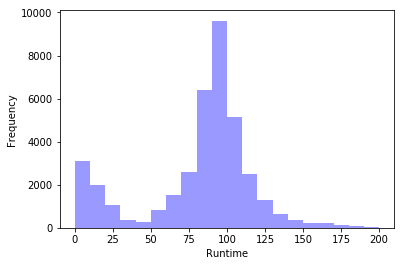

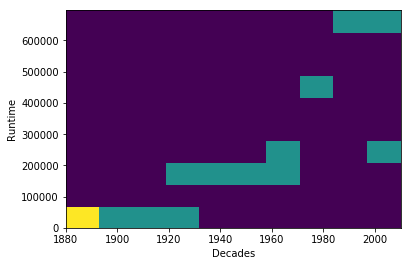

In [9]:
n, bins, patches = plt.hist(data.Runtime, bins=20, facecolor='blue', alpha=0.4,range=[0,200])
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

data5=data[["Year","Runtime"]]
data6=data5.groupby((data5["Year"]//10)*10).sum()
data6["Decades"]=data6.index
plt.hist2d(y=data6.Runtime,x=data6.Decades)
plt.xlabel('Decades')
plt.ylabel('Runtime')
plt.show()

Question: Comment on the distribution as well as relationships. Are there any patterns or trends that you can observe? Enter answer in the below cell.

Answer:The data is close to normaldistribution with some outliers. The runtime of movies is centred on an hour and a half.

### Task 3: Encode Genre Column

The column Genre represents a list of genres associated with the movie in a string format. Write code to parse each text string into a binary vector with 1s representing the presence of a genre and 0s the absence, and add it to the dataframe as additional columns. Then remove the original Genre column.
For example, if there are a total of 3 genres: Drama, Comedy, and Action, a movie that is both Action and Comedy should be represented by a binary vector <0, 1, 1>. Note that you need to first compile a dictionary of all possible genres and then figure out which movie has which genres.

In [10]:
data = data.join(data["Genre"].str.get_dummies(', '))
data

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,39 Pounds of Love,2005,UNRATED,2005-04-08,70.0,"Documentary, Biography, Romance",Dani Menkin,"Ilan Heitner, Dani Menkin",Ami Ankilewitz,...,0,0,1,0,0,0,0,0,0,0
1,2,3:am,2005,NOT RATED,2005-01-25,21.0,"Short, Thriller",Ryan Bradford,"Ryan Bradford, Ryen Schlegel","Mike Ashworth, Jen Badewitz, Ryan Bradford, Se...",...,0,0,0,0,1,0,0,1,0,0
2,3,500 Years Later,2005,NaN,2005-02-24,106.0,Documentary,Owen Alik Shahadah,M.K. Asante,"Kolfi Adu, Sona Jobarteh, Hunter Adams III, Ha...",...,0,0,0,0,0,0,0,0,0,0
3,4,5th World,2005,NaN,2005-01-20,75.0,"Drama, Romance",Blackhorse Lowe,Blackhorse Lowe,"Livandrea Knoki, Sheldon Silentwalker, Ernest ...",...,0,0,1,0,0,0,0,0,0,0
4,5,90,2005,NaN,2005-03-12,14.0,"War, Short",Jason Wise,Jason Wise,"Bryan Barnett-Woods, Oto Brezina, Mike Dunn, E...",...,0,0,0,0,1,0,0,0,1,0
5,6,Abel Raises Cain,2005,NaN,2005-01-23,82.0,"Documentary, Biography","Jenny Abel, Jeff Hockett","Jenny Abel, Jeff Hockett","Alan Abel, Jeanne Abel, Frank Murgalo, Jenny Abel",...,0,0,0,0,0,0,0,0,0,0
6,7,Acne,2000,NaN,2005-06-03,65.0,"Comedy, Horror, Sci-Fi",Rusty Nails,Rusty Nails,"Tracey Hayes, Rusty Nails, Jim Darley, Mary Lu...",...,0,0,0,1,0,0,0,0,0,0
7,8,One Senseless Act: The Khamisa Story,1999,NaN,NaN,NaN,Documentary,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,9,Akoibon,2005,NaN,2005-04-13,95.0,"Comedy, Adventure, Romance",Edouard Baer,Edouard Baer,"Jean Rochefort, Nader Boussandel, Marie Denarn...",...,0,0,1,0,0,0,0,0,0,0
9,10,Alien Abduction,2014,NOT RATED,2014-05-01,85.0,"Horror, Sci-Fi, Thriller",Matty Beckerman,Robert Lewis,"Katherine Sigismund, Corey Eid, Riley Polanski...",...,0,0,0,1,0,0,0,1,0,0


What are the 10 most common genres? Plot the relative proportions of movies having the top 10 most common genres.

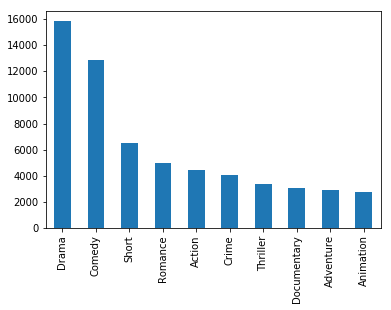

In [11]:
X = data[list(data.columns)[40:]]
freq=X.sum().nlargest(10)
freq.plot.bar()



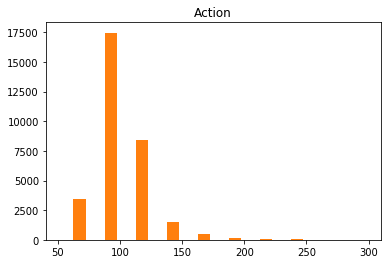

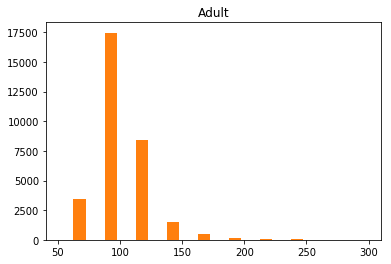

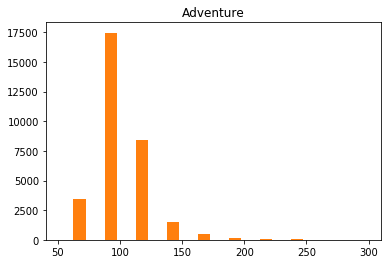

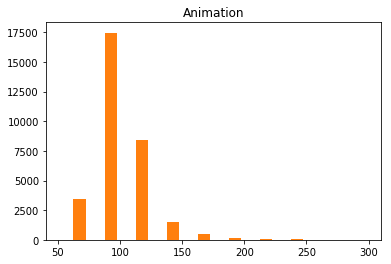

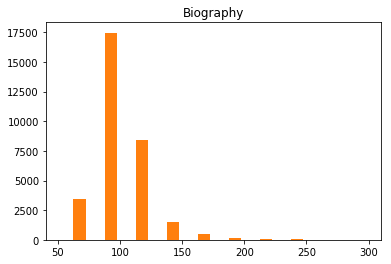

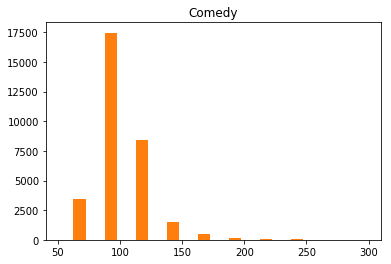

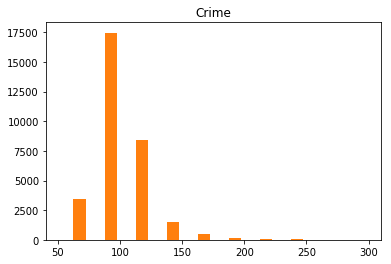

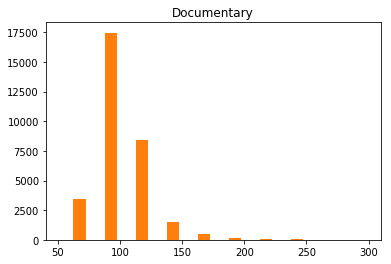

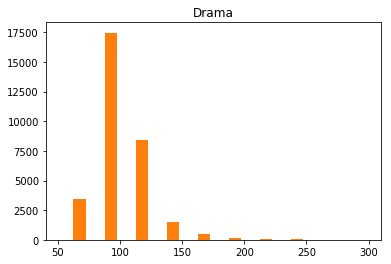

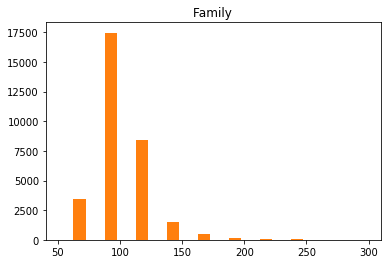

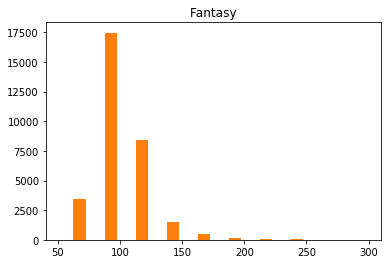

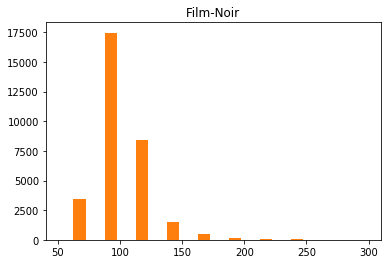

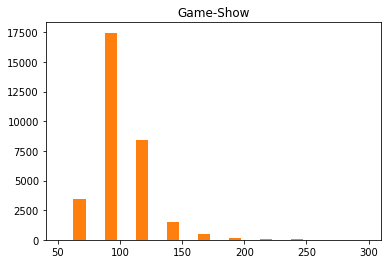

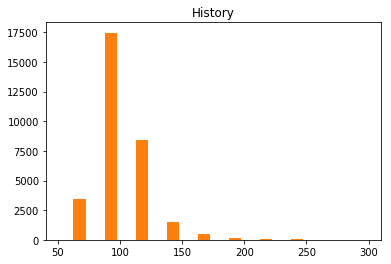

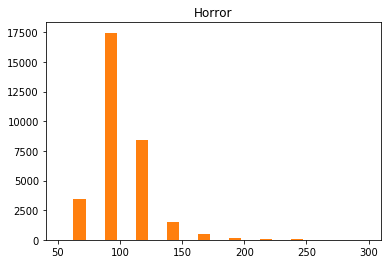

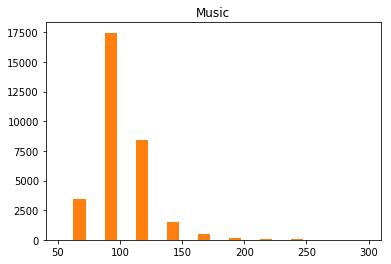

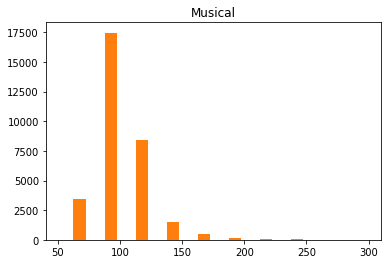

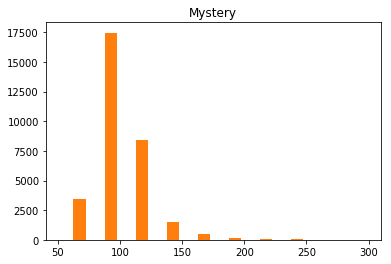

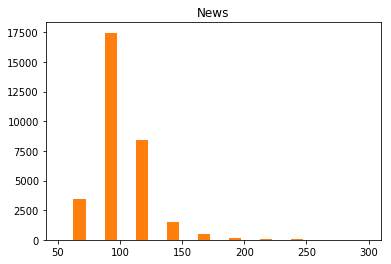

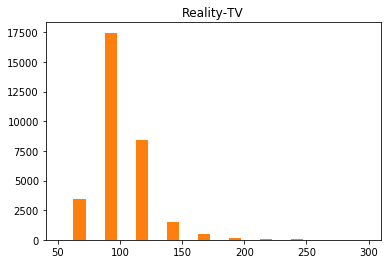

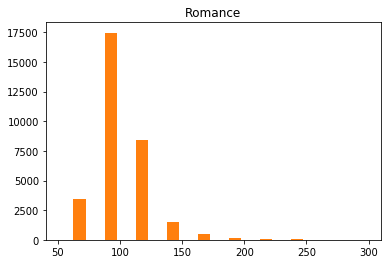

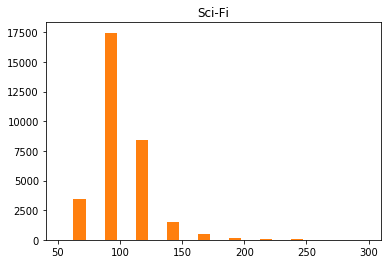

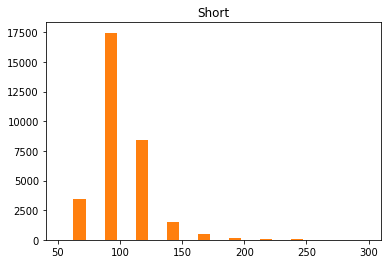

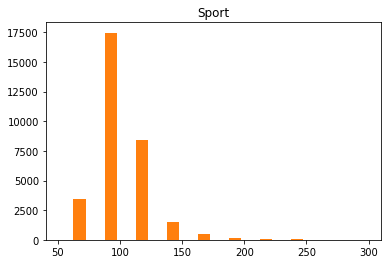

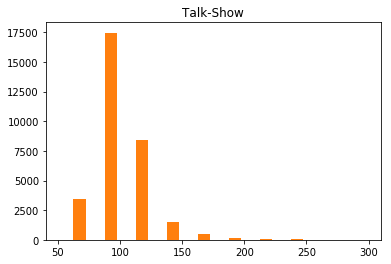

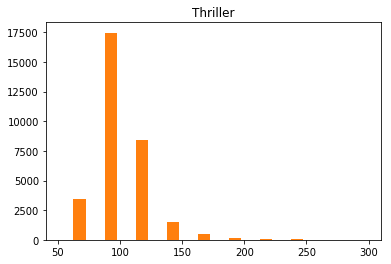

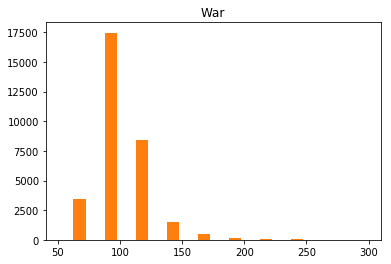

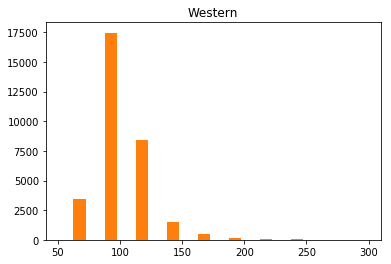

In [13]:
#Create histogram for each genre and display their runtime distribution
for gen in X:
    plt.hist([X[gen], data["Runtime"]], range=[50,300])
    plt.title(gen)
    plt.show()   

Examine how the distribution of Runtime changes across genres for the top 10 most common genres.

### Task 4: Eliminate mismatched rows

The dataframe was put together by merging two different sources of data and it is possible that the merging process was inaccurate in some cases (the merge was done based on movie title, but there are cases of different movies with the same title). The first source’s release time was represented by the column Year (numeric representation of the year) and the second by the column Released (string representation of release date).

Find and remove all rows where you suspect a merge error occurred based on a mismatch between these two variables. To make sure subsequent analysis and modeling work well, avoid removing more than 10% of the rows that have a Gross value present.

In [14]:
data['Released'] = pd.DatetimeIndex(data['Released']).year
data=data[(data['Year'] == data["Released"])] 
data.shape

(29324, 68)

In [15]:
data["Awards"].dropna().shape

(10813,)

### Task 5: Explore Gross revenue

For the commercial success of a movie, production houses want to maximize Gross revenue. Investigate if
Gross revenue is related to Budget, Runtime or Genre in any way.
Note: To get a meaningful relationship, you may have to partition the movies into subsets such as short vs. long duration, or by genre, etc.

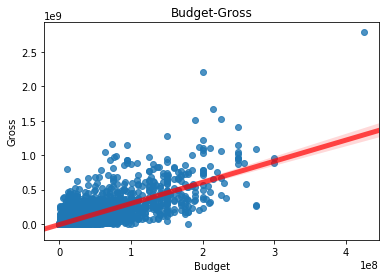

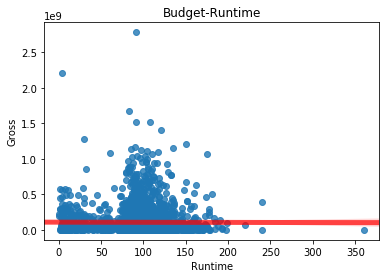

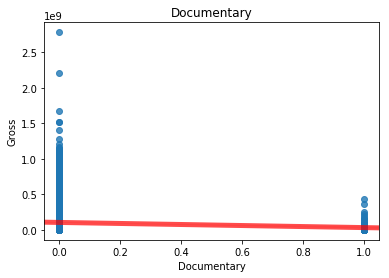

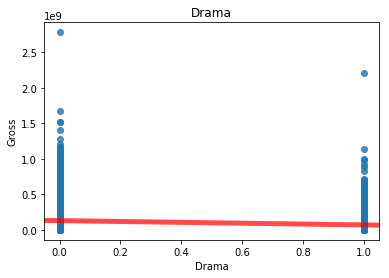

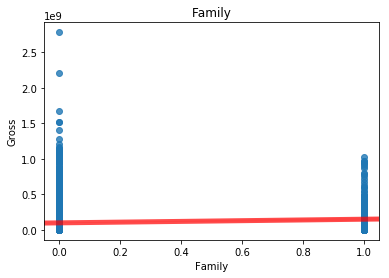

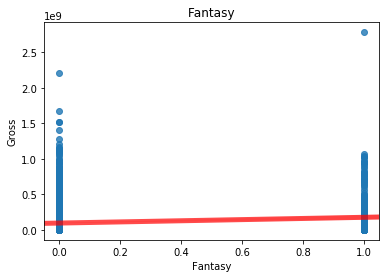

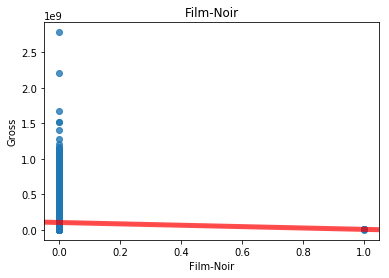

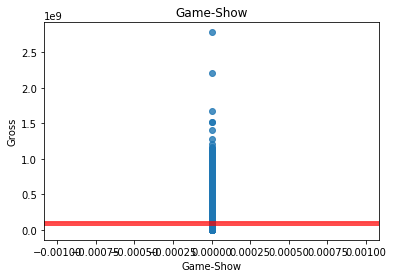

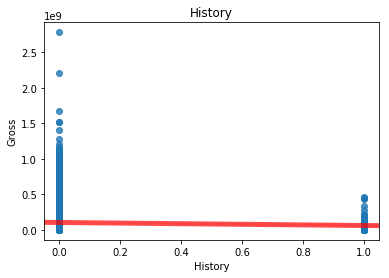

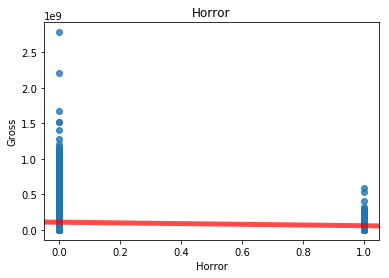

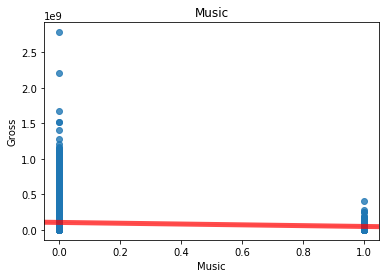

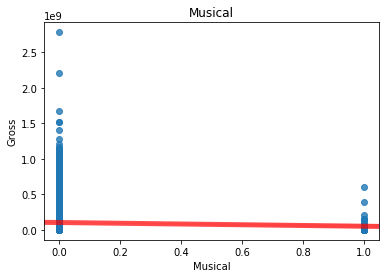

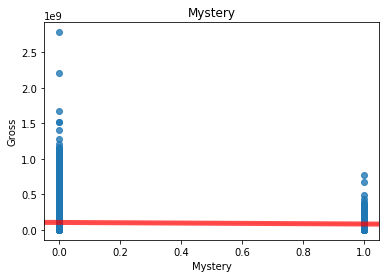

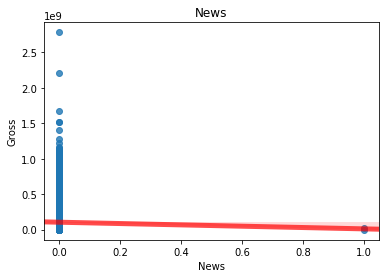

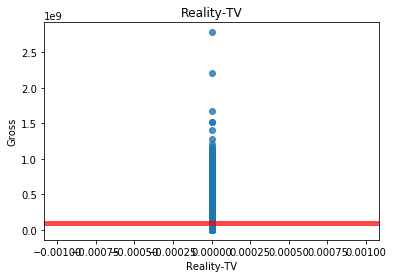

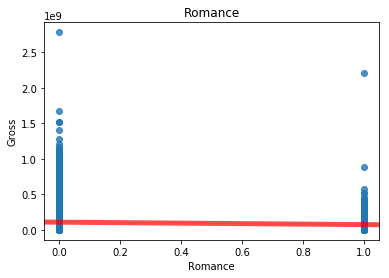

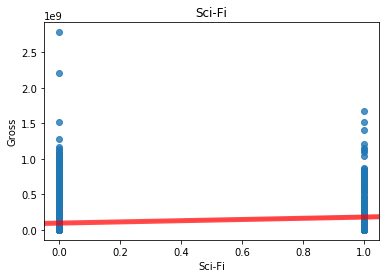

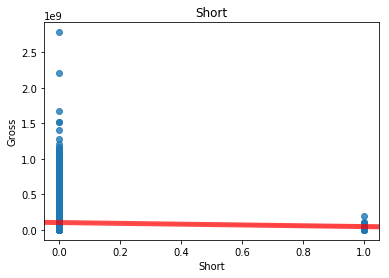

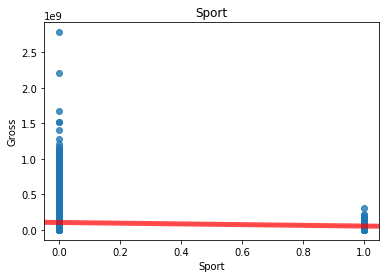

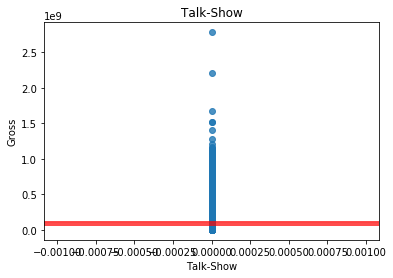

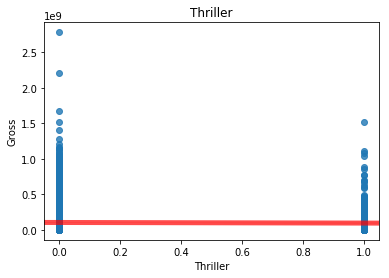

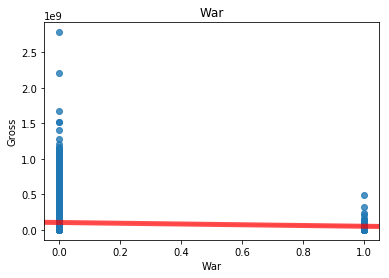

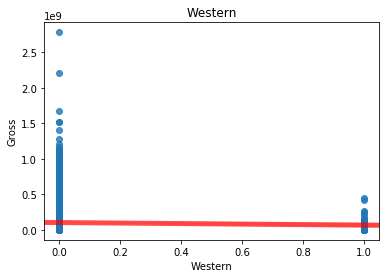

In [16]:
sns.regplot(y=data["Gross"], x=data["Budget"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Budget-Gross")
plt.show()
sns.regplot(y=data["Gross"], x=data["Runtime"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Budget-Runtime")
plt.show()
data1=data.loc[:,"Documentary":"Western"]
for i in data1:
    sns.regplot(y=data["Gross"], x=data1[i],line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.title(i)
    plt.show()

Question: Did you find any observable relationships or combinations of Budget/Runtime/Genre that result in high Gross revenue? If you divided the movies into different subsets, you may get different answers for them - point out interesting ones.

Answer:it has been discovered that there is a positive correlation between the Budget and Gross value

### Task 6: Process Awards Column

The variable Awards describes nominations and awards in text format. Convert it to 2 numeric columns, the first capturing the number of wins, and the second capturing nominations. Replace the Awards column with these new columns, and then study the relationship of Gross revenue with respect to them.
Note that the format of the Awards column is not standard; you may have to use regular expressions to find the relevant values. Try your best to process them, and you may leave the ones that don’t have enough information as NAs or set them to 0s.

In [17]:
data=data.reset_index(drop=True)
k=data.Awards.str.replace(r"(for|oscars|Oscars|Oscar|Golden Globes|Golden Globe|oscar)+","").str.replace(" & ",".").str.replace("  "," ").str.replace(r"\s\.\s",".").str.replace(r"(nominated|nominations|Nominated|nomination)+"," nomination").str.replace(r"(wins|Wins|Won|won|win)+","win").str.replace(r"[\s\.]","").str.replace("Another","|").fillna(0)
k1=k.str.extract(r'[win]+(\d+)', expand=True).fillna(0).astype(int)
k2=k.str.extract(r'(\d+)[win]+', expand=True).fillna(0).astype(int)
data["awards"]=k1+k2
k3=k.str.extract(r'[nomination]+(\d+)', expand=True).fillna(0).astype(int)
k4=k.str.extract(r'(\d+)[nomination]+', expand=True).fillna(0).astype(int) 
data["nomination"]=k3+k4


Question: How did you construct your conversion mechanism? How many rows had valid/non-zero wins or nominations?

Answer: If the records contains the word “Won”, then take the number and add it to the column “win”. Then check the number after the word “win”, add it to the column “win”. Then check the number after the word “nomination”, add it to the column “nomination”. 
2. Else if the record contains the word “Nominated”, then take the number and add it to the column “nomination”. Then check the number after the word “win”, add it to the column “win”. Then check the number after the word “nomination”, add it to the column “nomination” 
3. Else Then check the number after the word “win”, add it to the column “win”. Then check the number after the word “nomination”, add it to the column “nomination” 
4. Set rest as 0

### Task 7: Movie ratings from IMDb and Rotten Tomatoes

There are several variables that describe ratings, including IMDb ratings (imdbRating represents average user ratings and imdbVotes represents the number of user ratings), and multiple Rotten Tomatoes ratings (represented by several variables pre-fixed by tomato). Read up on such ratings on the web (for example
rottentomatoes.com/about and www.imdb.com/help/show_leaf?votestopfaq). Investigate the pairwise relationships between these different descriptors using graphs.

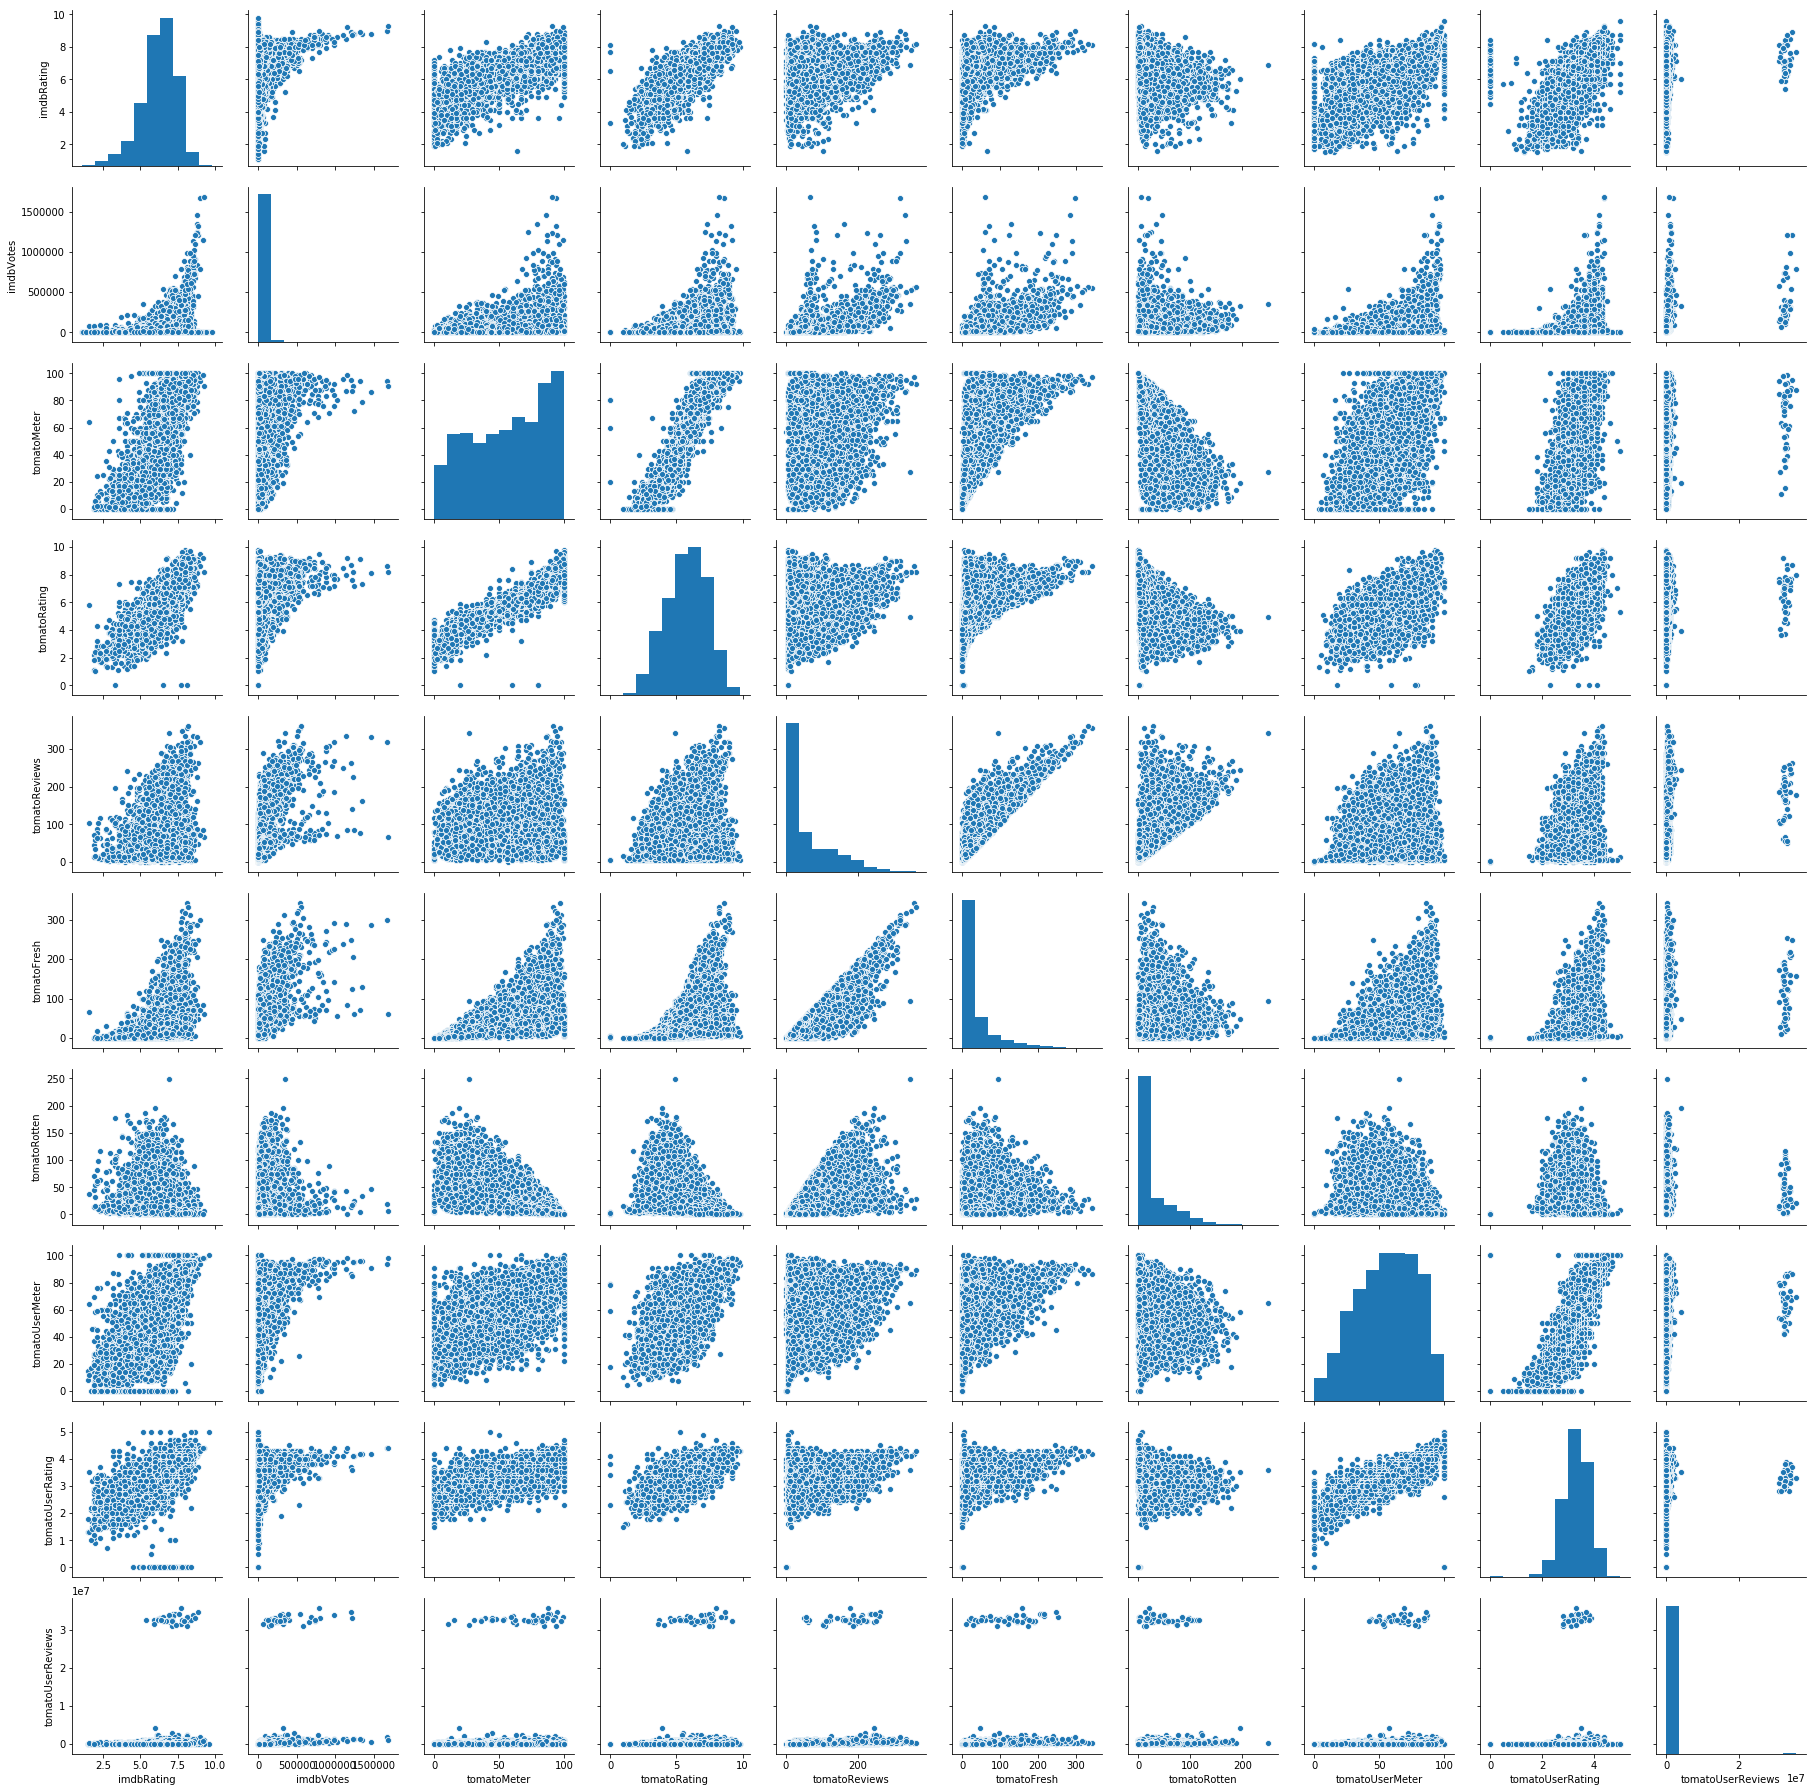

In [18]:
pairs=data[["imdbRating", "imdbVotes", "tomatoMeter", "tomatoRating","tomatoReviews" , "tomatoFresh","tomatoRotten" ,"tomatoUserMeter" , "tomatoUserRating","tomatoUserReviews"]]
sns.pairplot(pairs)

Question: Comment on the similarities and differences between the user ratings of IMDb and the critics ratings of Rotten Tomatoes.

Answer:TomatoReviews almost form a linear relationship with TomatoFresh

### Task 8: Ratings and awards

These ratings typically reflect the general appeal of the movie to the public or gather opinions from a larger body of critics. Whereas awards are given by professional societies that may evaluate a movie on specific attributes, such as artistic performance, screenplay, sound design, etc.
Study the relationship between ratings and awards using graphs (awards here refers to wins and/or nomina- tions).

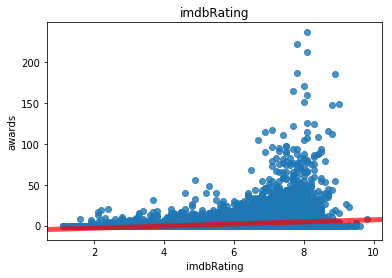

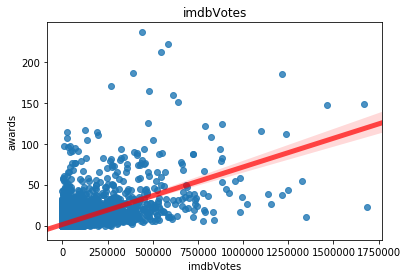

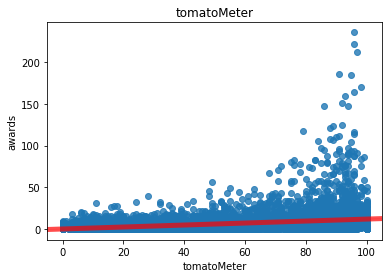

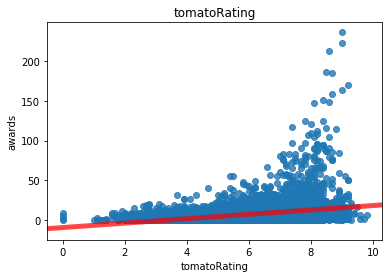

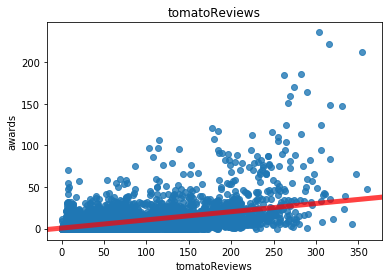

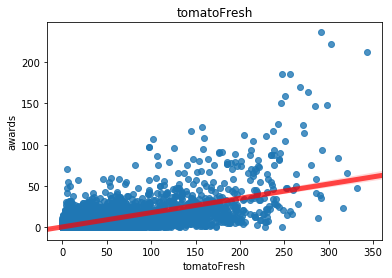

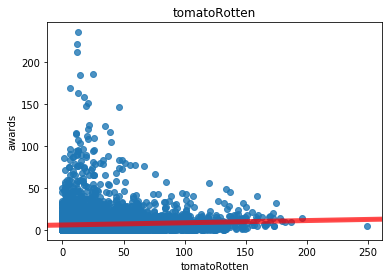

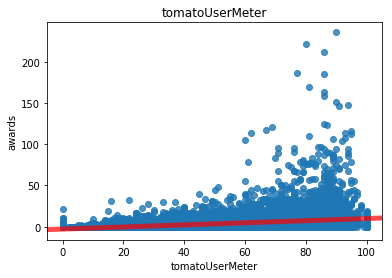

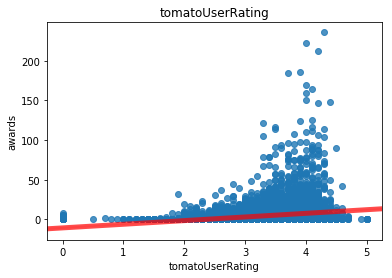

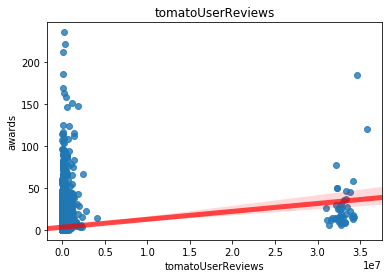

In [19]:
ratings=data[["imdbRating", "imdbVotes", "tomatoMeter", "tomatoRating","tomatoReviews" , "tomatoFresh","tomatoRotten" ,"tomatoUserMeter" , "tomatoUserRating","tomatoUserReviews"]]
for i in ratings:
    sns.regplot(y=data["awards"], x=ratings[i],line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.title(i)
    plt.show()


Q: How good are these ratings in terms of predicting the success of a movie in winning awards or nominations? Is there a high correlation between two variables?

Answer: All ratings have good linear correlation with awards but the highest correlation is between IMDB votes and total award.

### Task 9. Expected insights
Come up with two new insights (backed up by data and graphs) that is expected. Here “new” means insights that are not an immediate consequence of one of the above tasks. You may use any of the columns already explored above or a different one in the dataset, such as Title, Actors, etc.

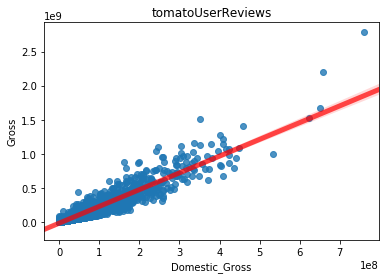

In [20]:
# code

sns.regplot(y=data["Gross"], x=data["Domestic_Gross"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title(i)
plt.show()


Answer: as expected, there is strong linear corelation between gross and domestic_gross

### Task 10. Unexpected insight
Come up with one new insight (backed up by data and graphs) that is unexpected at first glance and do your best to motivate it. Same instructions apply as the previous task.

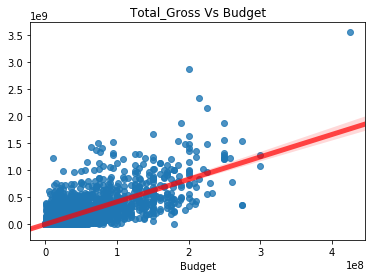

In [21]:
sns.regplot(y=data["Gross"]+ data["Domestic_Gross"], x=data["Budget"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Total_Gross Vs Budget")
plt.show()

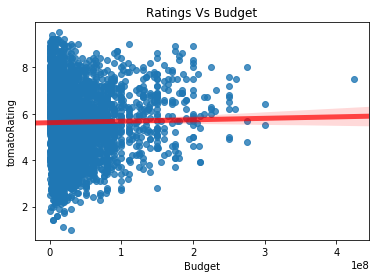

In [22]:
sns.regplot(y=data["tomatoRating"], x=data["Budget"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Ratings Vs Budget")
plt.show()

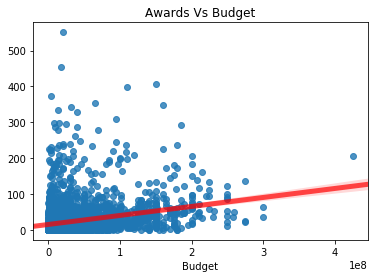

In [23]:
sns.regplot(y=data["nomination"]+data["awards"], x=data["Budget"],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Awards Vs Budget")
plt.show()

unexpected insights


Answer: As we notice,Budget is highly correlated with total gross and award winning and nominations but not with average critics ratings. This means that increasing the movie budget will increase its gross and also its awards’ chances, but it is irrelavant to critics reviews of the movie. I was expecting the awards's wins/nominations to correlate with tomatoRating, but it doesn't.